In [1]:
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
from statannot import add_stat_annotation

In [2]:
nom_carpetes = [3077, 3078, 3079, 3121, 3329, 3536, 3542, 3543, 3544, 4972, 4979, 4980, 4996, 4998, 5007, 
                5009, 5013, 5014, 5018, 5021, 5042, 5056, 5057, 5063, 5064, 5065, 5066, 5086, 5087, 5097, 
                5102, 5104, 5113, 5114, 3076, 3148, 3157, 3164, 3171, 3265, 3288, 3289, 3457, 4970, 4971, 
                4978, 4985, 4986, 4987, 4993, 4994, 4997, 5008, 5019, 5020, 5032, 5033, 5034, 5041, 5058, 
                5098, 5103, 5105, 5378] #64 : 34 CTR, 30 AD

num_carpetes = len(nom_carpetes)
nom_temps = ['t1', 't2', 't3', 't4', 't5']
num_temps = len(nom_temps)

## Selected features obtained from the binary classification 

**Hippocampus:**
- original_glcm_ClusterShade
- original_glrlm_RunLengthNonUniformity
- original_firstorder_Energy
- original_gldm_LargeDependenceEmphasis
- original_firstorder_10Percentile
- original_glszm_GrayLevelNonUniformity

### Glcm_Cluster Shade 

In [3]:
#We will fill out the matrix Cluster Shade by just selecting the values of this feature for all cases. 

path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'glcmtot.csv'
feat = 'original_glcm_ClusterShade'

matriu_original_glcm_ClusterShade = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    #We store in the first column rat type of each row 
    if (i<=33):
        tipus = 0 #CTR
    else:
        tipus = 1 #Tg
    
    for temps in nom_temps: #Each feature will have to be iterated 5 times because there are 5 evaluations.
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_glcm_ClusterShade[counter][0] = tipus
                        matriu_original_glcm_ClusterShade[counter][1] = valor
            else:
                matriu_original_glcm_ClusterShade[counter][0] = tipus
                matriu_original_glcm_ClusterShade[counter][1] = np.NaN
            
            counter = counter + 1      

In [4]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueClustershade.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_glcm_ClusterShade)

#Here, we create a dataframe considering just the rat type and the Cluster Shade values. 
names = ['Rat type', 'ClusterShade']
base_dades_ClusterShade = pd.DataFrame(matriu_original_glcm_ClusterShade, columns=names)

base_dades_ClusterShade = base_dades_ClusterShade.astype({'Rat type': 'str'})
#In order to be able to write CTR i Tg in the Rat type column. 

In [5]:
#Here, we change the values of 0,1 to the outputs CTR and Tg in order to show later the p-value plot. 

for i in range(len(base_dades_ClusterShade)):
    valor = base_dades_ClusterShade['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_ClusterShade['Rat type'].values[i] = valor 

In [6]:
x = 'Rat type'
y = 'ClusterShade'
order = ['CTR','Tg']
box_pairs=[('CTR', 'Tg')]

(<AxesSubplot:xlabel='Rat type', ylabel='ClusterShade'>,
 [<statannot.StatResult.StatResult at 0x7feefb5b94c0>])

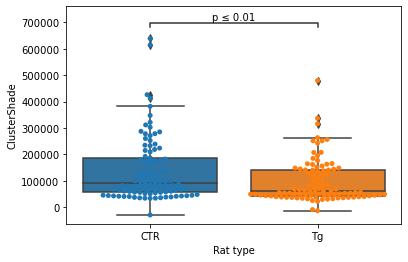

In [7]:
plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_ClusterShade, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_ClusterShade, order=order)
add_stat_annotation(ax, data=base_dades_ClusterShade, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

### Glrlm_RunLengthNonUniformity

In [8]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'glrlm.csv'
feat = 'original_glrlm_RunLengthNonUniformity'

matriu_original_glrlm_RunLengthNonUniformity = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    if (i<=33):
        tipus = 0 #ctr
    else:
        tipus = 1 #ad
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            #print(data_path)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_glrlm_RunLengthNonUniformity[counter][0] = tipus
                        matriu_original_glrlm_RunLengthNonUniformity[counter][1] = valor
            else:
                matriu_original_glrlm_RunLengthNonUniformity[counter][0] = tipus
                matriu_original_glrlm_RunLengthNonUniformity[counter][1] = np.NaN
            
            counter = counter + 1      

In [9]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueRunLengthNonUniformity.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_glrlm_RunLengthNonUniformity)

names = ['Rat type', 'RunLengthNonUniformity']
base_dades_RunLengthNonUniformity = pd.DataFrame(matriu_original_glrlm_RunLengthNonUniformity, columns=names)

base_dades_RunLengthNonUniformity = base_dades_RunLengthNonUniformity.astype({'Rat type': 'str'})

In [10]:
for i in range(len(base_dades_RunLengthNonUniformity)):
    valor = base_dades_RunLengthNonUniformity['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_RunLengthNonUniformity['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='RunLengthNonUniformity'>,
 [<statannot.StatResult.StatResult at 0x7feefb753bb0>])

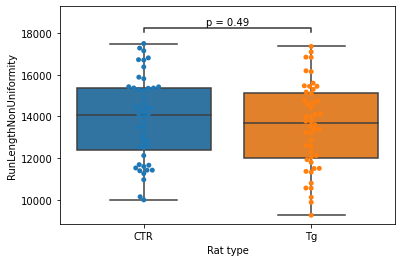

In [11]:
y = 'RunLengthNonUniformity'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_RunLengthNonUniformity, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_RunLengthNonUniformity, order=order)
add_stat_annotation(ax, data=base_dades_RunLengthNonUniformity, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

### Firstorder_Energy

In [12]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'firstordertot.csv'
feat = 'original_firstorder_Energy'

matriu_original_firstorder_Energy = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    if (i<=33):
        tipus = 0 
    else:
        tipus = 1 
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_firstorder_Energy[counter][0] = tipus
                        matriu_original_firstorder_Energy[counter][1] = valor
            else:
                matriu_original_firstorder_Energy[counter][0] = tipus
                matriu_original_firstorder_Energy[counter][1] = np.NaN
            
            counter = counter + 1      

In [13]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueEnergy.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_firstorder_Energy)

names = ['Rat type', 'Energy']
base_dades_Energy = pd.DataFrame(matriu_original_firstorder_Energy, columns=names)

base_dades_Energy = base_dades_Energy.astype({'Rat type': 'str'})

In [14]:
for i in range(len(base_dades_Energy)):
    valor = base_dades_Energy['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_Energy['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='Energy'>,
 [<statannot.StatResult.StatResult at 0x7feefb863e80>])

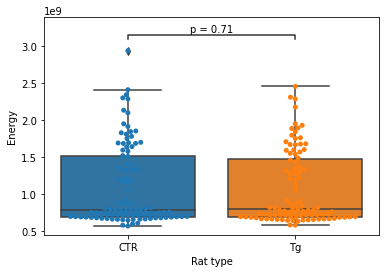

In [15]:
y = 'Energy'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_Energy, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_Energy, order=order)
add_stat_annotation(ax, data=base_dades_Energy, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

### Gldm_Large Dependence Emphasis 

In [16]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'gldmtot.csv'
feat = 'original_gldm_LargeDependenceEmphasis'

matriu_original_gldm_LargeDependenceEmphasis = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    if (i<=33):
        tipus = 0 
    else:
        tipus = 1 
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_gldm_LargeDependenceEmphasis[counter][0] = tipus
                        matriu_original_gldm_LargeDependenceEmphasis[counter][1] = valor
            else:
                matriu_original_gldm_LargeDependenceEmphasis[counter][0] = tipus
                matriu_original_gldm_LargeDependenceEmphasis[counter][1] = np.NaN
            
            counter = counter + 1      

In [17]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueLargeDependenceEmphasis.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_gldm_LargeDependenceEmphasis)

names = ['Rat type', 'LargeDependenceEmphasis']
base_dades_LargeDependenceEmphasis = pd.DataFrame(matriu_original_gldm_LargeDependenceEmphasis, columns=names)

base_dades_LargeDependenceEmphasis = base_dades_LargeDependenceEmphasis.astype({'Rat type': 'str'})

In [18]:
for i in range(len(base_dades_LargeDependenceEmphasis)):
    valor = base_dades_LargeDependenceEmphasis['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_LargeDependenceEmphasis['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='LargeDependenceEmphasis'>,
 [<statannot.StatResult.StatResult at 0x7feefb98f610>])

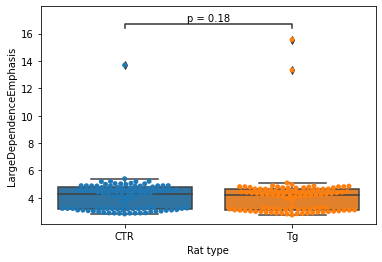

In [19]:
y = 'LargeDependenceEmphasis'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_LargeDependenceEmphasis, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_LargeDependenceEmphasis, order=order)
add_stat_annotation(ax, data=base_dades_LargeDependenceEmphasis, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

### Firstorder_10Percentile 

In [20]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'firstordertot.csv'
feat = 'original_firstorder_10Percentile'

matriu_original_firstorder_10Percentile = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    if (i<=33):
        tipus = 0
    else:
        tipus = 1 
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_firstorder_10Percentile[counter][0] = tipus
                        matriu_original_firstorder_10Percentile[counter][1] = valor
            else:
                matriu_original_firstorder_10Percentile[counter][0] = tipus
                matriu_original_firstorder_10Percentile[counter][1] = np.NaN
            
            counter = counter + 1      

In [21]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalue10Percentile.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_firstorder_10Percentile)

names = ['Rat type', '10Percentile']
base_dades_10Percentile = pd.DataFrame(matriu_original_firstorder_10Percentile, columns=names)

base_dades_10Percentile = base_dades_10Percentile.astype({'Rat type': 'str'})

In [22]:
for i in range(len(base_dades_10Percentile)):
    valor = base_dades_10Percentile['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_10Percentile['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='10Percentile'>,
 [<statannot.StatResult.StatResult at 0x7feefbaa5790>])

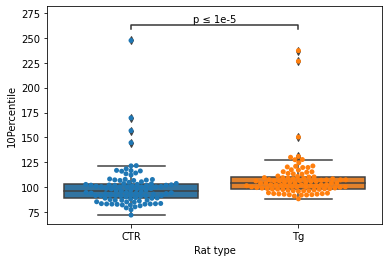

In [23]:
y = '10Percentile'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_10Percentile, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_10Percentile, order=order)
add_stat_annotation(ax, data=base_dades_10Percentile, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

### Glszm_GrayLevelNonUniformity

In [24]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'glszmtot.csv'
feat = 'original_glszm_GrayLevelNonUniformity'

matriu_original_glszm_GrayLevelNonUniformity = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    if (i<=33):
        tipus = 0 
    else:
        tipus = 1 
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_glszm_GrayLevelNonUniformity[counter][0] = tipus
                        matriu_original_glszm_GrayLevelNonUniformity[counter][1] = valor
            else:
                matriu_original_glszm_GrayLevelNonUniformity[counter][0] = tipus
                matriu_original_glszm_GrayLevelNonUniformity[counter][1] = np.NaN
            
            counter = counter + 1      

In [25]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueGrayLevelNonUniformity.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_glszm_GrayLevelNonUniformity)

names = ['Rat type', 'GrayLevelNonUniformity']
base_dades_GrayLevelNonUniformity = pd.DataFrame(matriu_original_glszm_GrayLevelNonUniformity, columns=names)

base_dades_GrayLevelNonUniformity  = base_dades_GrayLevelNonUniformity .astype({'Rat type': 'str'})

In [26]:
for i in range(len(base_dades_GrayLevelNonUniformity )):
    valor = base_dades_GrayLevelNonUniformity ['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'CTR'
    else:
        valor = 'Tg'
    
    base_dades_GrayLevelNonUniformity['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='GrayLevelNonUniformity'>,
 [<statannot.StatResult.StatResult at 0x7feefbbbfca0>])

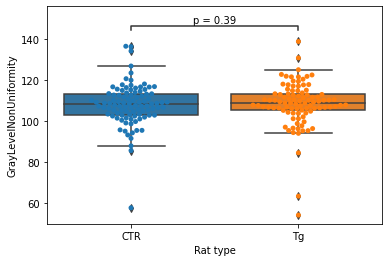

In [27]:
y = 'GrayLevelNonUniformity'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_GrayLevelNonUniformity, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_GrayLevelNonUniformity, order=order)
add_stat_annotation(ax, data=base_dades_GrayLevelNonUniformity, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction=None)

## Selected features obtained from the multi-class classification 

**Hippocampus:** 
- original_glcm_ClusterShade
- original_ngtdm_Complexity
- original_firstorder_Energy
- original_gldm_LargeDependenceEmphasis
- original_firstorder_10Percentile
- original_firstorder_Minimum

### Glcm_ClusterShade 

In [28]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'glcmtot.csv'
feat = 'original_glcm_ClusterShade'

matriu_original_glcm_ClusterShade = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            #From t1-t3 is considered as Young. From t4-t5 is considered as Old.
            #If i<33 is considered as CTR. Otherwise, considered as Tg.
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 #Young-CTR
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 #Young-CTR
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 #Young-CTR
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 #Old-CTR
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 #Old-CTR
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 #Young-Tg
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 #Young-Tg
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 ##Young-Tg
            
            else:
                tipus = 3 #Old-Tg
            
            if os.path.isfile(data_path):
                with open(data_path) as Features:
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)

                    for row in reader: 
                        valor = row[feat]
                        matriu_original_glcm_ClusterShade[counter][0] = tipus
                        matriu_original_glcm_ClusterShade[counter][1] = valor
            else:
                matriu_original_glcm_ClusterShade[counter][0] = tipus
                matriu_original_glcm_ClusterShade[counter][1] = np.NaN
            
            counter = counter + 1      

In [29]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueClustershade.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_glcm_ClusterShade)

names = ['Rat type', 'ClusterShade']
base_dades_ClusterShade = pd.DataFrame(matriu_original_glcm_ClusterShade, columns=names)

base_dades_ClusterShade = base_dades_ClusterShade.astype({'Rat type': 'str'})

In [30]:
for i in range(len(base_dades_ClusterShade)):
    valor = base_dades_ClusterShade['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_ClusterShade['Rat type'].values[i] = valor

In [31]:
x = 'Rat type'
y = 'ClusterShade'
order = ['YOUNG-CTR','OLD-CTR','YOUNG-Tg', 'OLD-Tg']
box_pairs=[("YOUNG-CTR", "OLD-CTR"), ("YOUNG-CTR", "YOUNG-Tg"), ("YOUNG-Tg", "OLD-Tg"), ("OLD-CTR", "OLD-Tg")]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<AxesSubplot:xlabel='Rat type', ylabel='ClusterShade'>,
  <statannot.StatResult.StatResult at 0x7feefbd5f2e0>])

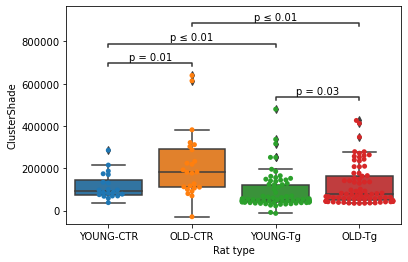

In [32]:
plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_ClusterShade, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_ClusterShade, order=order)
add_stat_annotation(ax, data=base_dades_ClusterShade, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')

### Ngtdm_Complexity

In [33]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'ngtdmtot.csv'
feat = 'original_ngtdm_Complexity'

matriu_original_ngtdm_Complexity = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 
            
            else:
                tipus = 3 
            
            if os.path.isfile(data_path):
                with open(data_path) as Features:
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)

                    for row in reader: 
                        valor = row[feat]
                        matriu_original_ngtdm_Complexity[counter][0] = tipus
                        matriu_original_ngtdm_Complexity[counter][1] = valor
            else:
                matriu_original_ngtdm_Complexity[counter][0] = tipus
                matriu_original_ngtdm_Complexity[counter][1] = np.NaN
            
            counter = counter + 1      

In [34]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueComplexity.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_ngtdm_Complexity)

names = ['Rat type', 'Complexity']
base_dades_Complexity = pd.DataFrame(matriu_original_ngtdm_Complexity, columns=names)

base_dades_Complexity = base_dades_Complexity.astype({'Rat type': 'str'})

In [35]:
for i in range(len(base_dades_Complexity)):
    valor = base_dades_Complexity['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_Complexity['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='Complexity'>,
  <statannot.StatResult.StatResult at 0x7feefbd9d4f0>])

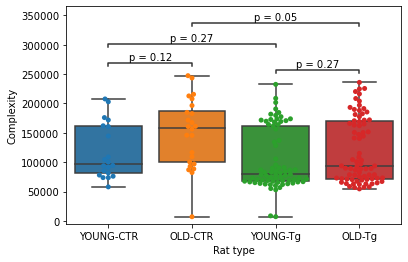

In [36]:
y = 'Complexity'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_Complexity, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_Complexity, order=order)
add_stat_annotation(ax, data=base_dades_Complexity, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')

### Firstorder_Energy 

In [37]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'firstordertot.csv'
feat = 'original_firstorder_Energy'

matriu_original_firstorder_Energy = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 
            
            else:
                tipus = 3 
                
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        #print(valor)
                        matriu_original_firstorder_Energy[counter][0] = tipus
                        matriu_original_firstorder_Energy[counter][1] = valor
            else:
                matriu_original_firstorder_Energy[counter][0] = tipus
                matriu_original_firstorder_Energy[counter][1] = np.NaN
            
            counter = counter + 1   

In [38]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueEnergy.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_firstorder_Energy)

names = ['Rat type', 'Energy']
base_dades_Energy = pd.DataFrame(matriu_original_firstorder_Energy, columns=names)

base_dades_Energy = base_dades_Energy.astype({'Rat type': 'str'})

In [39]:
for i in range(len(base_dades_Energy)):
    valor = base_dades_Energy['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_Energy['Rat type'].values[i] = valor 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<AxesSubplot:xlabel='Rat type', ylabel='Energy'>,
  <statannot.StatResult.StatResult at 0x7feefbf31160>])

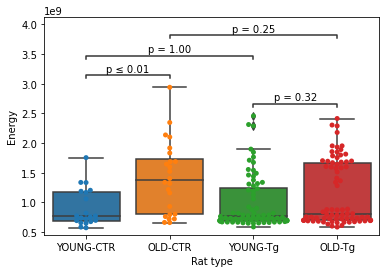

In [40]:
y = 'Energy'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_Energy, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_Energy, order=order)
add_stat_annotation(ax, data=base_dades_Energy, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')

### Gldm_Large Dependence Emphasis 

In [41]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'gldmtot.csv'
feat = 'original_gldm_LargeDependenceEmphasis'

matriu_original_gldm_LargeDependenceEmphasis = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 
            
            else:
                tipus = 3 
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_gldm_LargeDependenceEmphasis[counter][0] = tipus
                        matriu_original_gldm_LargeDependenceEmphasis[counter][1] = valor
            else:
                matriu_original_gldm_LargeDependenceEmphasis[counter][0] = tipus
                matriu_original_gldm_LargeDependenceEmphasis[counter][1] = np.NaN
            
            counter = counter + 1

In [42]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueLargeDependenceEmphasis.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_gldm_LargeDependenceEmphasis)

names = ['Rat type', 'LargeDependenceEmphasis']
base_dades_LargeDependenceEmphasis = pd.DataFrame(matriu_original_gldm_LargeDependenceEmphasis, columns=names)

base_dades_LargeDependenceEmphasis = base_dades_LargeDependenceEmphasis.astype({'Rat type': 'str'})

In [43]:
for i in range(len(base_dades_LargeDependenceEmphasis)):
    valor = base_dades_LargeDependenceEmphasis['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_LargeDependenceEmphasis['Rat type'].values[i] = valor 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<AxesSubplot:xlabel='Rat type', ylabel='LargeDependenceEmphasis'>,
  <statannot.StatResult.StatResult at 0x7feefbe5edc0>])

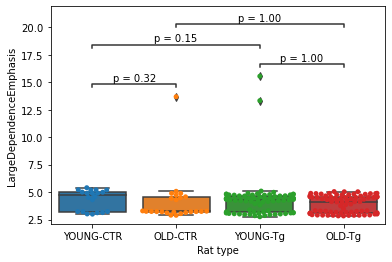

In [44]:
y = 'LargeDependenceEmphasis'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_LargeDependenceEmphasis, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_LargeDependenceEmphasis, order=order)
add_stat_annotation(ax, data=base_dades_LargeDependenceEmphasis, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')

### Firstorder_10Percentile 

In [45]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'firstordertot.csv'
feat = 'original_firstorder_10Percentile'

matriu_original_firstorder_10Percentile = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 
            
            else:
                tipus = 3 
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_firstorder_10Percentile[counter][0] = tipus
                        matriu_original_firstorder_10Percentile[counter][1] = valor
            else:
                matriu_original_firstorder_10Percentile[counter][0] = tipus
                matriu_original_firstorder_10Percentile[counter][1] = np.NaN
            
            counter = counter + 1  

In [46]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalue10Percentile.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_firstorder_10Percentile)

names = ['Rat type', '10Percentile']
base_dades_10Percentile = pd.DataFrame(matriu_original_firstorder_10Percentile, columns=names)

base_dades_10Percentile = base_dades_10Percentile.astype({'Rat type': 'str'})

In [47]:
for i in range(len(base_dades_10Percentile)):
    valor = base_dades_10Percentile['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_10Percentile['Rat type'].values[i] = valor 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<AxesSubplot:xlabel='Rat type', ylabel='10Percentile'>,
  <statannot.StatResult.StatResult at 0x7feefc3d6ca0>])

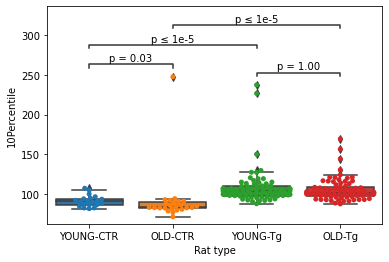

In [48]:
y = '10Percentile'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_10Percentile, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_10Percentile, order=order)
add_stat_annotation(ax, data=base_dades_10Percentile, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')

### Firstorder_Minimum 

In [49]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"
fitxer = 'firstordertot.csv'
feat = 'original_firstorder_Minimum'

matriu_original_firstorder_Minimum = np.zeros((num_carpetes*num_temps,2))
counter = 0

for i in range(num_carpetes):
    
    case = nom_carpetes[i]
    
    for temps in nom_temps: 
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            
            if (i<=33) and (temps == 't1'):
                tipus = 0 
                
            elif (i<=33) and (temps == 't2'):
                tipus = 0 
                
            if (i<=33) and (temps == 't3'):
                tipus = 0 
            
            elif (i<=33) and (temps == 't4'):
                tipus = 1 
                
            elif (i<=33) and (temps == 't5'):
                tipus = 1 
                
            elif (i>33) and (temps == 't1'):
                tipus = 2 
                
            elif (i>33) and (temps == 't2'):
                tipus = 2 
                
            elif (i>33) and (temps == 't3'):
                tipus = 2 
            
            else:
                tipus = 3 
                
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        matriu_original_firstorder_Minimum[counter][0] = tipus
                        matriu_original_firstorder_Minimum[counter][1] = valor
            else:
                matriu_original_firstorder_Minimum[counter][0] = tipus
                matriu_original_firstorder_Minimum[counter][1] = np.NaN
            
            counter = counter + 1  

In [50]:
datapath = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/pvalueMinimum.csv'
with open(datapath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_original_firstorder_Minimum)

names = ['Rat type', 'Minimum']
base_dades_Minimum = pd.DataFrame(matriu_original_firstorder_Minimum, columns=names)

base_dades_Minimum = base_dades_Minimum.astype({'Rat type': 'str'})

In [51]:
for i in range(len(base_dades_Minimum)):
    valor = base_dades_Minimum['Rat type'].values[i]
    
    if (valor == '0.0'):
        valor = 'YOUNG-CTR'
    
    elif (valor == '1.0'):
        valor = 'OLD-CTR'
        
    elif (valor == '2.0'):
        valor = 'YOUNG-Tg'
        
    else:
        valor = 'OLD-Tg'
    
    base_dades_Minimum['Rat type'].values[i] = valor 

(<AxesSubplot:xlabel='Rat type', ylabel='Minimum'>,
  <statannot.StatResult.StatResult at 0x7feefc5cefa0>])

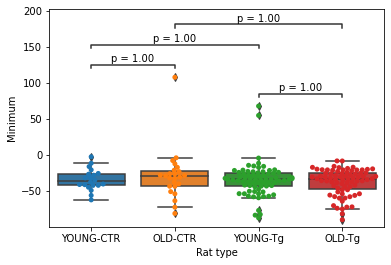

In [52]:
y = 'Minimum'

plt.figure()
ax=sns.boxplot(x=x, y=y, data=base_dades_Minimum, order=order)
sns.swarmplot(x=x, y=y, data=base_dades_Minimum, order=order)
add_stat_annotation(ax, data=base_dades_Minimum, x=x, y=y, order=order,
                  box_pairs=box_pairs, test='Kruskal',
                   text_format='simple', loc='inside', verbose=0,
                   comparisons_correction='bonferroni')